# Kuprenas et al. 2018 modification to the Winterwerp formulation for average floc size

This notebook contains the information needed to play around with:
2. the equilibrium floc size given a range of turbulent shear rates and two concentration levels.

The **equilibrium floc size** comes from setting $dD/dt=0$ in the above and solving for $D$ (or $D_e$):

\begin{equation}
D_{e}=\left[\left(\frac{k_{A}^{'}}{k_{B}^{'}}\frac{1}{\rho_{s}}\right)D_{p}^{n_{f}+p-3}C\left(\frac{\mu}{F_{y}}\right)^{-q}G^{-q}\right]^{1/(2q+p+n_{f}-3)}
\label{eq:De1}
\end{equation}

## Imports and function definitions

In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

def W98Meq(De,Ka, Kb,Fy, c2, C, G):
    q = c1+c2*De/sqrt(nu/G)
    return De-(Ka/(Kb*rhos))**(1/(2*q))*(mu/Fy)**(-1/2)*C**(1/(2*q))*G**(-1/2)
    
def density(To,Sppt):
    rho_fresh=1000*(1-(To +288.9414)/(508929.2*(To+68.12963))*(To-3.9863)**2)
    Acoef = 0.824493 - 0.0040899*To + 0.000076438*To**2 -0.00000082467*To**3 + 0.0000000053675*To**4
    Bcoef = -0.005724 + 0.00010227*To - 0.0000016546*To**2
    return rho_fresh + Acoef*Sppt + Bcoef*Sppt**(3/2) + 0.00048314*Sppt**2

def visc(To):
    return 2.7488e-07+1.4907e-06*exp(-0.034812*To)

Populating the interactive namespace from numpy and matplotlib


## Equilibrium size as a function of $G$
### Original coefficient values

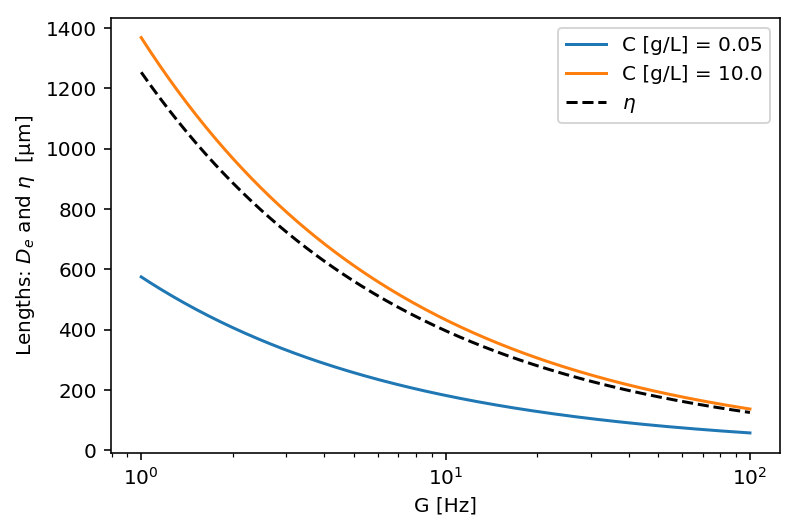

In [2]:
"""
User input --------------------------------------------------------
"""

# Fluid properties 
Glower = 1             # turbulent shear rate lower bound [s-1]
Gupper = 100           # turbulent shear rate upper bound [s-1]     
To = 4                 # temperature in degC
Sppt = 35              # salinity in parts per thousand 

# Sediment properties
Clower = 50/10**3      # lower bound on suspended sediment concentration [g/L]
Cupper = 10000/10**3   # upper bound on suspended sediment concentration [g/L]
Dp = 5/10**6           # primary particle size [m]
Fy = 1e-10             # floc yeild strength [N]
rhos = 2650.           # sediment density [kg/m3]
nf = 2.0               # fractal dimension
dmax = 500             # rough size of largest flocs in [µm]

# Model inputs initial guess for fit values (change if there are convergence issues) 
Ka = 0.38              # the primed aggregation coefficient 
Kb = 6.2e-5           # the primed breakup coefficient
c1 = 0.5               # in the model for q; should use 0.5
c2 = 1.0               # in the model for q; use 1.5 to 3.5

"""
Calculations ----------------------------------------------------
"""

rho = density(To,Sppt)
nu = visc(To)
mu = nu*rho

p = 3.-nf

NumG = 200
Grange = logspace(log10(Glower),log10(Gupper),NumG)
DfeC1 = zeros(NumG)
DfeC2 = zeros(NumG)

# calculate the equilibrium floc size as a function of the G array, C values, and user inputs

for i in range(0,NumG):
    DfeC1[i] = fsolve(W98Meq,sqrt(nu/Grange[i]), args=(Ka, Kb, Fy, c2, Clower, Grange[i]))
    DfeC2[i] = fsolve(W98Meq,sqrt(nu/Grange[i]), args=(Ka, Kb, Fy, c2, Cupper, Grange[i]))

DfeC1o = DfeC1.copy()
DfeC2o = DfeC2.copy()
    
"""
Plot ----------------------------------------------------
"""

fig, ax = plt.subplots()
ax.plot(Grange,DfeC1*10**6, label='C [g/L] = '+str(Clower))
ax.plot(Grange,DfeC2*10**6, label='C [g/L] = '+str(Cupper))
ax.plot(Grange,sqrt(nu/Grange)*10**6,'k--', label='$\eta$')
ax.set_xscale('log')
ax.set_xlabel('G [Hz]')
ax.set_ylabel('Lengths: $D_{e}$ and $\eta$  [µm]')
legend(loc=1);
# ax.axhline(y=dmax, color='k', linestyle='--', alpha=0.5)
# ax.text(12,dmax+50, 'upper bound for \n most flocs', 
#         clip_on='True', multialignment='center', alpha=1);

### Modified coefficient values

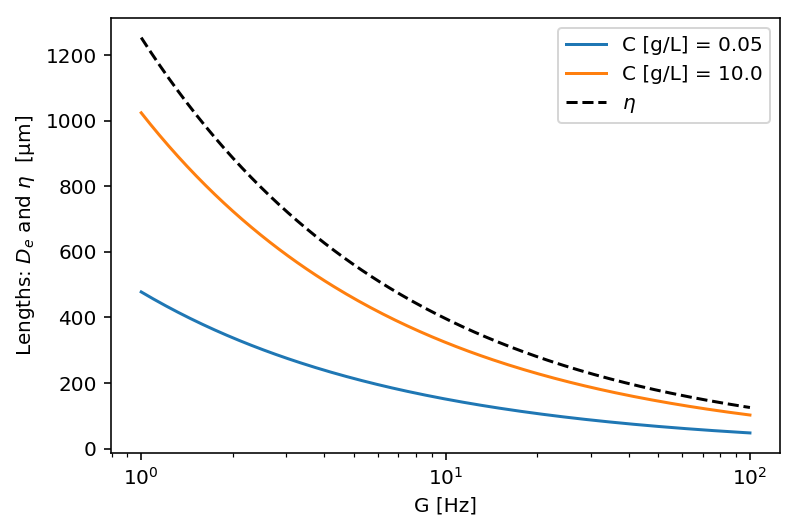

In [3]:
"""
User input --------------------------------------------------------
"""

# Fluid properties 
Glower = 1            # turbulent shear rate lower bound [s-1]
Gupper = 100          # turbulent shear rate upper bound [s-1]     
To = 4                # temperature in degC
Sppt = 35             # salinity in parts per thousand 

# Sediment properties
Clower = 50/10**3     # lower bound on suspended sediment concentration [g/L]
Cupper = 10000/10**3  # upper bound on suspended sediment concentration [g/L]
Dp = 5/10**6          # primary particle size [m]
Fy = 1e-10            # floc yeild strength [N]
rhos = 2500.          # sediment density [kg/m3]
nf = 2.0              # fractal dimension
dmax = 500            # rough size of largest flocs in [µm]

# Model inputs initial guess for fit values (change if there are convergence issues) 
Ka = 0.5              # the primed aggregation coefficient 
Kb = 1.5e-6           # the primed breakup coefficient
c1 = 0.5              # in the model for q; should use 0.5
c2 = 2.5              # in the model for q; use 1.5 to 3.5

"""
Calculations ----------------------------------------------------
"""

rho = density(To,Sppt)
nu = visc(To)
mu = nu*rho

p = 3.-nf

NumG = 200
Grange = logspace(log10(Glower),log10(Gupper),NumG)
DfeC1 = zeros(NumG)
DfeC2 = zeros(NumG)

# calculate the equilibrium floc size as a function of the G array, C values, and user inputs

for i in range(0,NumG):
    DfeC1[i] = fsolve(W98Meq,sqrt(nu/Grange[i]), args=(Ka, Kb, Fy, c2, Clower, Grange[i]))
    DfeC2[i] = fsolve(W98Meq,sqrt(nu/Grange[i]), args=(Ka, Kb, Fy, c2, Cupper, Grange[i]))

DfeC1n = DfeC1.copy()
DfeC2n = DfeC2.copy()
    
"""
Plot ----------------------------------------------------
"""

fig, ax = plt.subplots()
ax.plot(Grange,DfeC1*10**6, label='C [g/L] = '+str(Clower))
ax.plot(Grange,DfeC2*10**6, label='C [g/L] = '+str(Cupper))
ax.plot(Grange,sqrt(nu/Grange)*10**6,'k--', label='$\eta$')
ax.set_xscale('log')
ax.set_xlabel('G [Hz]')
ax.set_ylabel('Lengths: $D_{e}$ and $\eta$  [µm]')
legend(loc=1);
# ax.axhline(y=dmax, color='k', linestyle='--', alpha=0.5)
# ax.text(12,dmax+50, 'upper bound for \n most flocs', 
#         clip_on='True', multialignment='center', alpha=1);

### Comparison of old and new

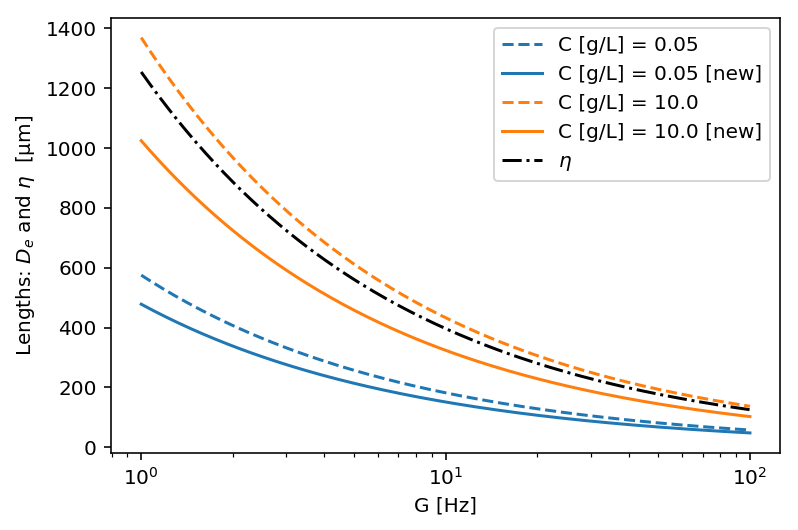

In [4]:
"""
Plot ----------------------------------------------------
"""
dmax = 500
fig, ax = plt.subplots()
ax.plot(Grange,DfeC1o*10**6, color='C0',linestyle='--',label='C [g/L] = '+str(Clower))
ax.plot(Grange,DfeC1n*10**6, color='C0',linestyle='-',label='C [g/L] = '+str(Clower)+' [new]')
ax.plot(Grange,DfeC2o*10**6, color='C1',linestyle='--',label='C [g/L] = '+str(Cupper))
ax.plot(Grange,DfeC2n*10**6, color='C1',linestyle='-',label='C [g/L] = '+str(Cupper)+' [new]')
ax.plot(Grange,sqrt(nu/Grange)*10**6,'k-.', label='$\eta$')
ax.set_xscale('log')
ax.set_xlabel('G [Hz]')
ax.set_ylabel('Lengths: $D_{e}$ and $\eta$  [µm]')
legend(loc=1);
# ax.axhline(y=dmax, color='k', linestyle='--', alpha=0.5)
# ax.text(12,dmax+50, 'upper bound for \n most flocs', 
#         clip_on='True', multialignment='center', alpha=1);